In [ ]:
!pip install matplotlib-venn
!pip install pandas numpy matplotlib seaborn scikit-learn!

!pip install memory_profiler

ERROR: Invalid requirement: 'scikit-learn!'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_score, recall_score
from matplotlib_venn import venn2, venn2_circles
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import time
from tabulate import tabulate
import psutil
import os
import memory_profiler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Penny.csv")
df

,Unnamed: 0,Stock,Stock Price,Market Cap,Volatility,Liquidity,P/E Ratio,EPS,Listing Exchange,Penny or Not
0,0,UEPEO,70.050003,7153786368,0.019124,100,13.727220,5.103,PNK,1
1,1,UEPCP,68.800003,7026131456,0.010468,0,13.482265,5.103,PNK,1
2,2,BLPG,0.080000,660012,0.156879,30001,8.000000,0.010,PNK,1
3,3,AIZ,168.300003,8850998272,0.017511,412900,17.155962,9.810,NYQ,0
4,4,ADC,60.110001,6063115264,0.011389,732700,35.358820,1.700,NYQ,0
...,...,...,...,...,...,...,...,...,...,...
489,489,ASX,8.740000,18822725632,0.019495,3593900,16.185184,0.540,NYQ,0
490,490,UNXP,1.580000,24635360,0.083375,0,158.000020,0.010,PNK,1
491,491,AYI,182.860001,5659114496,0.017825,266800,17.010233,10.750,NYQ,0
492,492,AGNC,9.050000,6076867072,0.018083,21172000,18.854168,0.480,NMS,0


In [ ]:
#dropping infinity values
df['P/E Ratio'] = df['P/E Ratio'].replace('Infinity', np.inf)
df = df.replace([np.inf, -np.inf], np.nan).dropna()
df

,Unnamed: 0,Stock,Stock Price,Market Cap,Volatility,Liquidity,P/E Ratio,EPS,Listing Exchange,Penny or Not
0,0,UEPEO,70.050003,7153786368,0.019124,100,13.727220,5.103,PNK,1
1,1,UEPCP,68.800003,7026131456,0.010468,0,13.482265,5.103,PNK,1
2,2,BLPG,0.080000,660012,0.156879,30001,8.000000,0.010,PNK,1
3,3,AIZ,168.300003,8850998272,0.017511,412900,17.155962,9.810,NYQ,0
4,4,ADC,60.110001,6063115264,0.011389,732700,35.358820,1.700,NYQ,0
...,...,...,...,...,...,...,...,...,...,...
489,489,ASX,8.740000,18822725632,0.019495,3593900,16.185184,0.540,NYQ,0
490,490,UNXP,1.580000,24635360,0.083375,0,158.000020,0.010,PNK,1
491,491,AYI,182.860001,5659114496,0.017825,266800,17.010233,10.750,NYQ,0
492,492,AGNC,9.050000,6076867072,0.018083,21172000,18.854168,0.480,NMS,0


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,Stock,Stock Price,Market Cap,Volatility,Liquidity,P/E Ratio,EPS,Listing Exchange,Penny or Not
0,UEPEO,70.050003,7153786368,0.019124,100,13.727220,5.103,PNK,1
1,UEPCP,68.800003,7026131456,0.010468,0,13.482265,5.103,PNK,1
2,BLPG,0.080000,660012,0.156879,30001,8.000000,0.010,PNK,1
3,AIZ,168.300003,8850998272,0.017511,412900,17.155962,9.810,NYQ,0
4,ADC,60.110001,6063115264,0.011389,732700,35.358820,1.700,NYQ,0
...,...,...,...,...,...,...,...,...,...
489,ASX,8.740000,18822725632,0.019495,3593900,16.185184,0.540,NYQ,0
490,UNXP,1.580000,24635360,0.083375,0,158.000020,0.010,PNK,1
491,AYI,182.860001,5659114496,0.017825,266800,17.010233,10.750,NYQ,0
492,AGNC,9.050000,6076867072,0.018083,21172000,18.854168,0.480,NMS,0


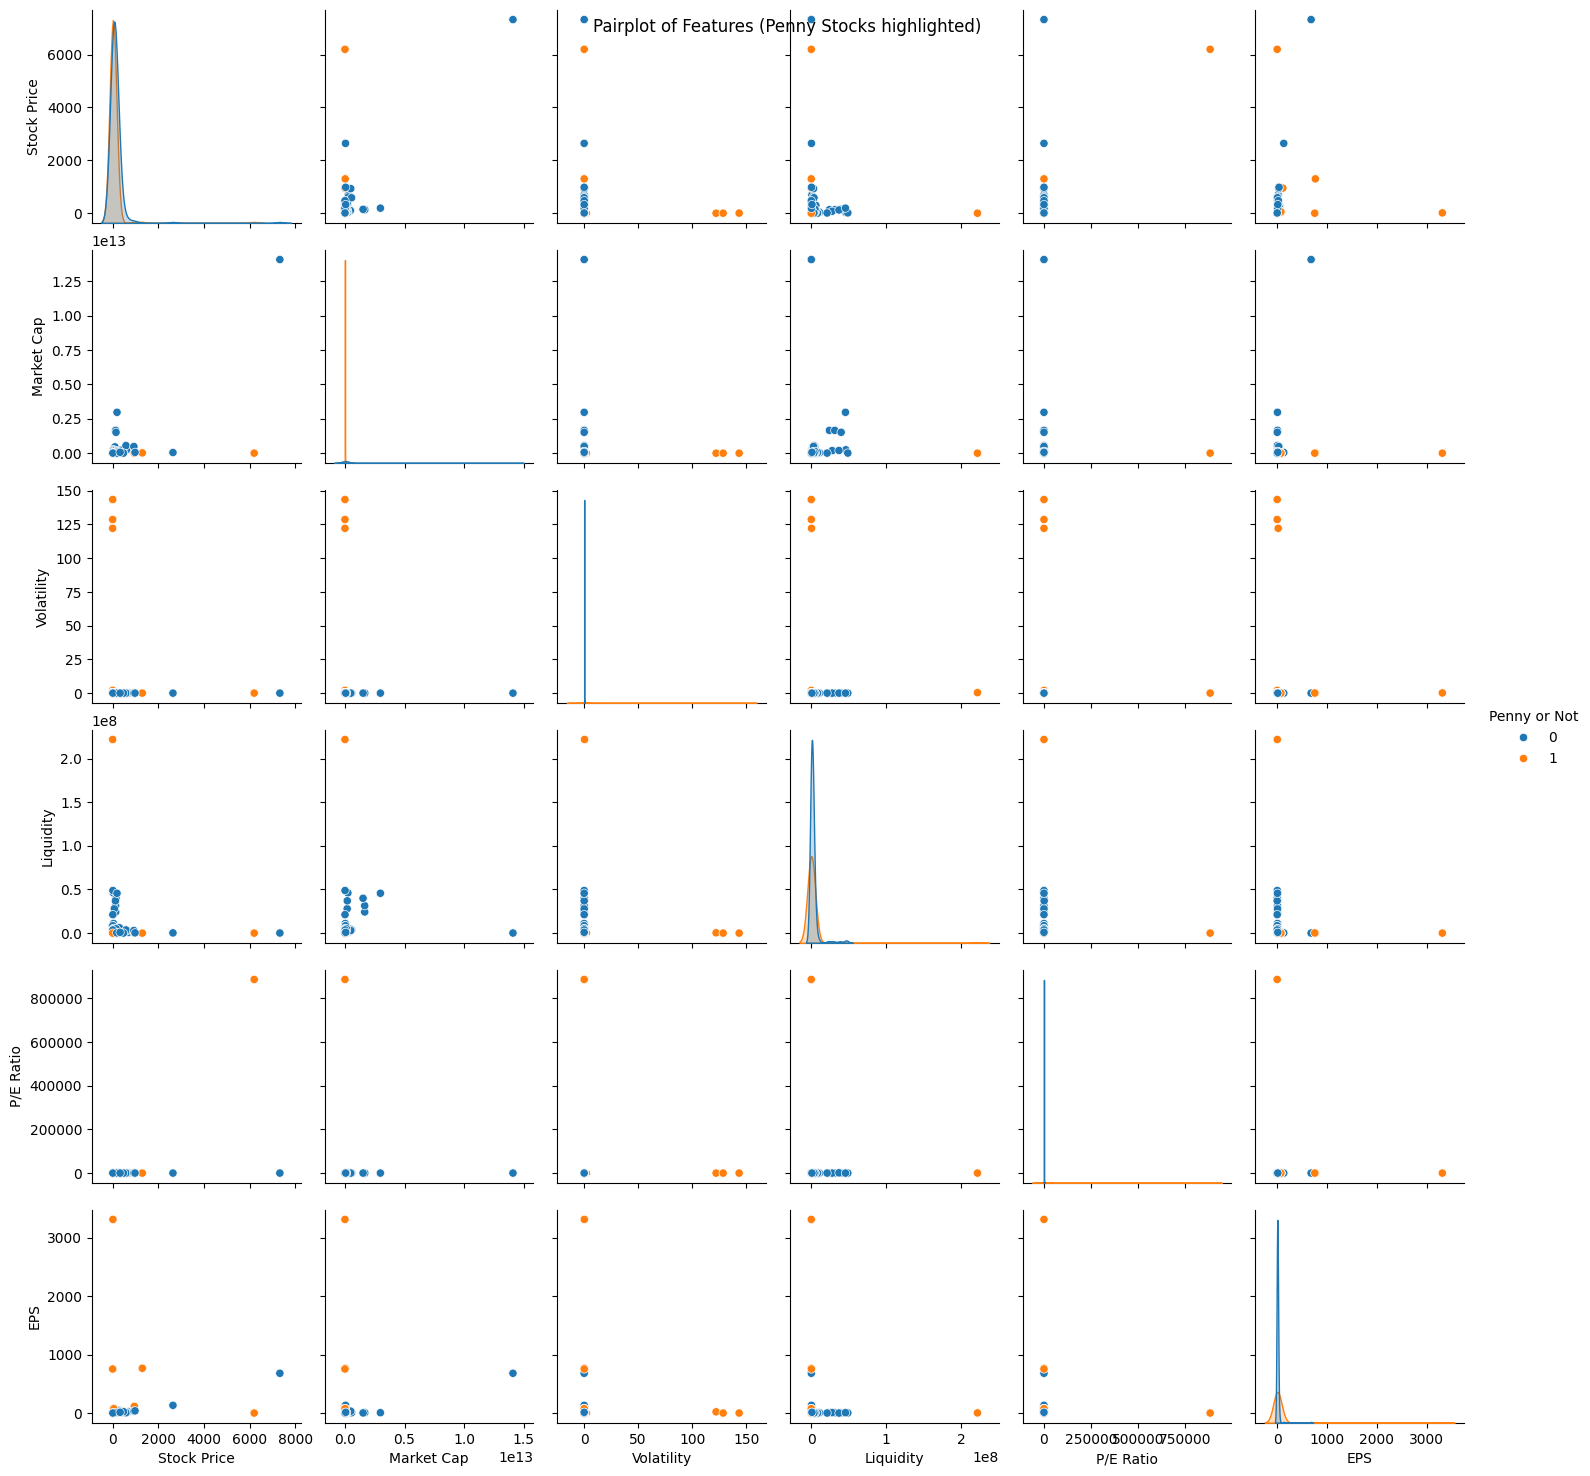

In [ ]:

sns.pairplot(df, hue='Penny or Not', diag_kind='kde')
plt.suptitle('Pairplot of Features (Penny Stocks highlighted)')
plt.show()

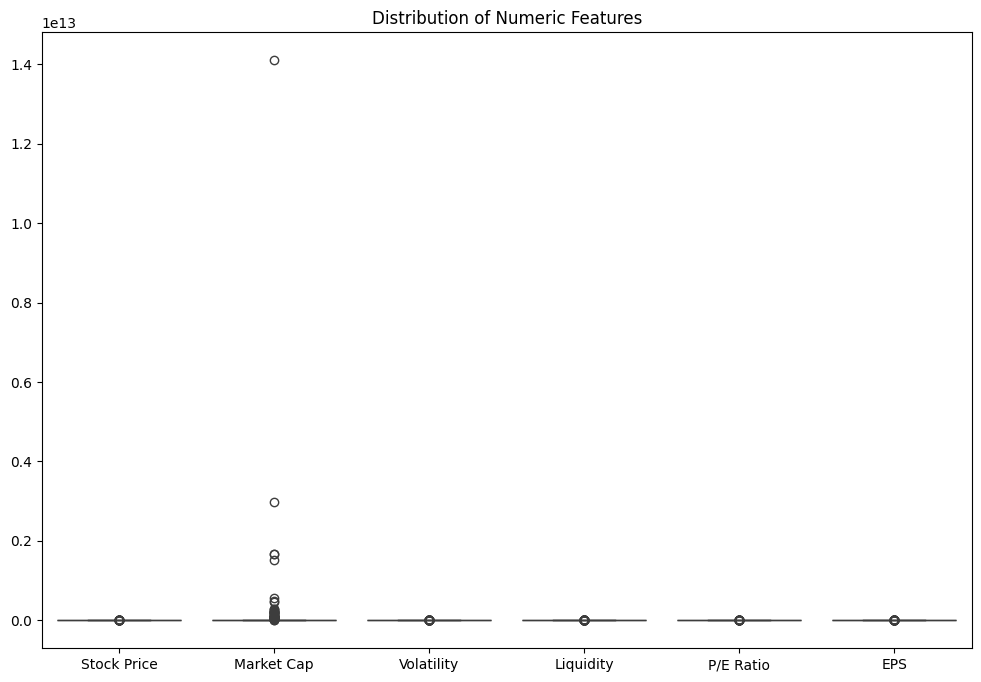

In [ ]:
# Numeric features
numeric_features = ['Stock Price', 'Market Cap', 'Volatility', 'Liquidity', 'P/E Ratio', 'EPS']

# Box plots for numeric features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_features])
plt.title('Distribution of Numeric Features')
plt.show()


<Figure size 1200x800 with 0 Axes>

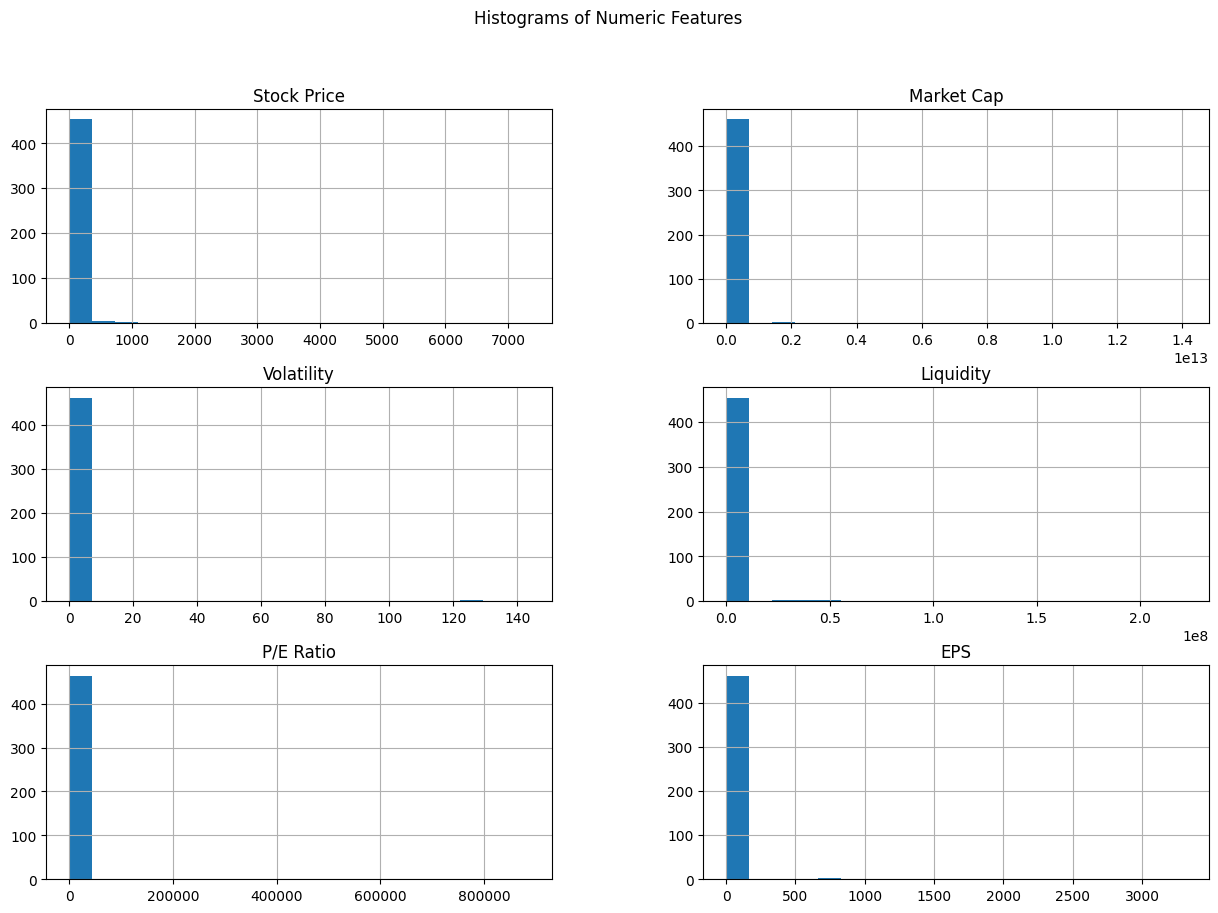

In [ ]:

# Histograms for numeric features
plt.figure(figsize=(12, 8))
df[numeric_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
df['Listing Exchange'] = label_encoder.fit_transform(df['Listing Exchange'])
df

,Stock,Stock Price,Market Cap,Volatility,Liquidity,P/E Ratio,EPS,Listing Exchange,Penny or Not
0,UEPEO,70.050003,7153786368,0.019124,100,13.727220,5.103,6,1
1,UEPCP,68.800003,7026131456,0.010468,0,13.482265,5.103,6,1
2,BLPG,0.080000,660012,0.156879,30001,8.000000,0.010,6,1
3,AIZ,168.300003,8850998272,0.017511,412900,17.155962,9.810,5,0
4,ADC,60.110001,6063115264,0.011389,732700,35.358820,1.700,5,0
...,...,...,...,...,...,...,...,...,...
489,ASX,8.740000,18822725632,0.019495,3593900,16.185184,0.540,5,0
490,UNXP,1.580000,24635360,0.083375,0,158.000020,0.010,6,1
491,AYI,182.860001,5659114496,0.017825,266800,17.010233,10.750,5,0
492,AGNC,9.050000,6076867072,0.018083,21172000,18.854168,0.480,4,0


In [ ]:
X = df.drop(['Penny or Not','Stock',], axis=1)
y = df['Penny or Not']

# Standardize numerical features
numerical_columns = ['Stock Price', 'Market Cap', 'Volatility', 'Liquidity', 'P/E Ratio', 'EPS','Listing Exchange']

scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
X

,Stock Price,Market Cap,Volatility,Liquidity,P/E Ratio,EPS,Listing Exchange
0,-0.062842,-0.083321,-0.082584,-0.164648,-0.047050,-0.079974,0.809234
1,-0.065488,-0.083509,-0.083405,-0.164657,-0.047056,-0.079974,0.809234
2,-0.210938,-0.093840,-0.069522,-0.162040,-0.047190,-0.110936,0.809234
3,0.145109,-0.080826,-0.082737,-0.128644,-0.046966,-0.051359,-0.093149
4,-0.083881,-0.084925,-0.083318,-0.100750,-0.046523,-0.100662,-0.093149
...,...,...,...,...,...,...,...
489,-0.192609,-0.066162,-0.082549,0.148806,-0.046990,-0.107714,-0.093149
490,-0.207763,-0.093805,-0.076492,-0.164657,-0.043533,-0.110936,0.809234
491,0.175927,-0.085519,-0.082708,-0.141386,-0.046970,-0.045645,-0.093149
492,-0.191953,-0.084905,-0.082683,1.681984,-0.046925,-0.108079,-0.995533


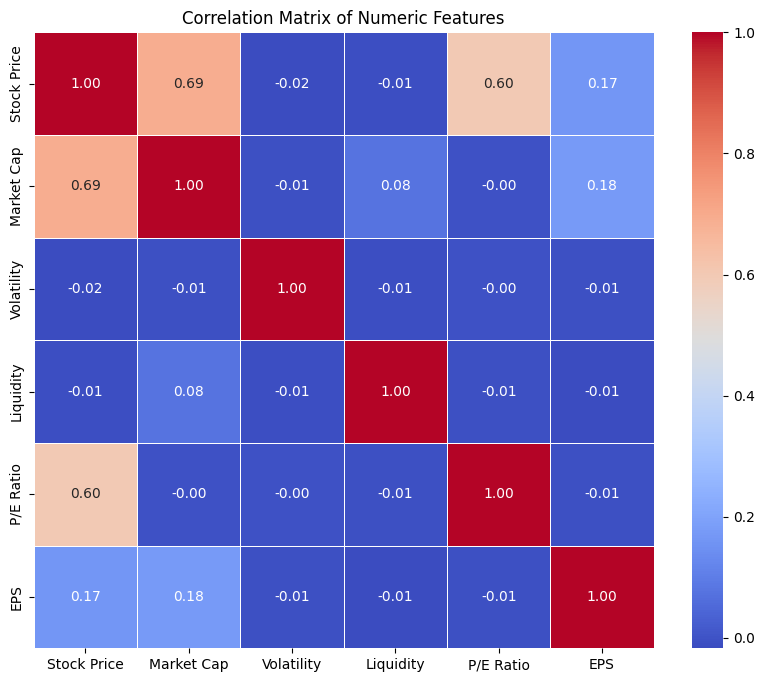

In [ ]:
correlation_matrix = df[numeric_features].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Regression Model

In [ ]:
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024**2)

In [ ]:
#Regression Model
Lr_start_memory = memory_usage()
Lr_start_time = time.time()
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training set

logreg_model.fit(X_train, y_train)
Lr_end_memory = memory_usage()
Lr_end_time = time.time()
Lr_time =  Lr_end_time - Lr_start_time
Lr_memory_usage = Lr_end_memory -Lr_start_memory




0.0


In [ ]:
# Test the model on the test set
y_test_pred = logreg_model.predict(X_test)

# Evaluate the model on the test set
Lr_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Test Accuracy: {Lr_accuracy}')
print(f'Confusion Matrix (Test):\n{conf_matrix_test}')

Test Accuracy: 0.9714285714285714
Confusion Matrix (Test):
[[69  0]
 [ 4 67]]


In [ ]:
# Precision and Recall
precision_logreg = precision_score(y_test, y_test_pred)
recall_logreg = recall_score(y_test, y_test_pred)

print(f'Logistic Regression - Precision: {precision_logreg:.2f}, Recall: {recall_logreg:.2f}')


Logistic Regression - Precision: 1.00, Recall: 0.94


PCA

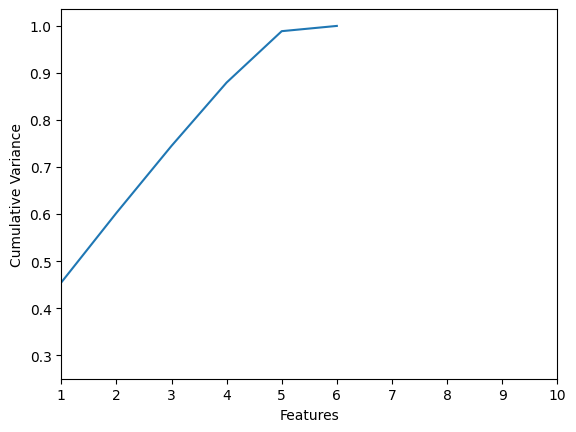

In [ ]:
#Decide the number of PCA components based on retained information
pca = PCA(random_state=42)
pca.fit(X)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.ylabel("Cumulative Variance")
plt.xlabel("Features")
plt.xlim(1, 10)
plt.plot(explained_variance)


In [ ]:
# Perform PCA
pca = PCA(n_components=5)  # Retain components explaining 95% of variance

X_pca = pca.fit_transform(X)
X_pca

array([[-0.28427587,  0.46386826,  0.18974549, -0.08047929,  0.34918657],
       [-0.28615048,  0.46335703,  0.18932498, -0.08102046,  0.34967677],
       [-0.39734964,  0.45362828,  0.17966915, -0.06596291,  0.33377711],
       ...,
       [ 0.06008178,  0.01019667, -0.05632137, -0.16442966, -0.10064718],
       [ 0.03988293, -1.01166197, -0.98048791,  1.11961333,  0.25620223],
       [ 0.32011738,  0.0074903 , -0.06350083, -0.11565003, -0.08318736]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


In [ ]:
#Regression Model
Lr2_start_memory =memory_usage()
Lr2_start_time = time.time()
logreg_model2 = LogisticRegression(random_state=42)

# Train the model on the training set

logreg_model2.fit(X_train, y_train)
Lr2_end_memory = memory_usage()
Lr2_end_time = time.time()
Lr2_time = Lr2_end_time - Lr2_start_time
Lr2_memory_usage = Lr2_end_memory - Lr2_start_memory


In [ ]:
# Test the model on the test set
y_test_pred2 = logreg_model2.predict(X_test)

# Evaluate the model on the test set
Lr2_accuracy = accuracy_score(y_test, y_test_pred2)
conf_matrix_test2 = confusion_matrix(y_test, y_test_pred2)

print(f'Test Accuracy: {Lr2_accuracy}')
print(f'Confusion Matrix (Test):\n{conf_matrix_test2}')

Test Accuracy: 0.9714285714285714
Confusion Matrix (Test):
[[69  0]
 [ 4 67]]


In [ ]:

# Precision and Recall
precision_logreg2 = precision_score(y_test, y_test_pred2)
recall_logreg2 = recall_score(y_test, y_test_pred2)

print(f'Logistic Regression - Precision: {precision_logreg2:.2f}, Recall: {recall_logreg2:.2f}')

Logistic Regression - Precision: 1.00, Recall: 0.94


SVM Model

In [ ]:
# Initialize and train SVM model
svm_start_memory = memory_usage()
svm_start_time = time.time()
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train, y_train)
svm_end_memory = memory_usage()
svm_end_time = time.time()
svm_time = svm_end_time -svm_start_time
svm_memory_usage = svm_end_memory - svm_start_memory


In [ ]:
# Predictions on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model on the test set
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
conf_matrix_test_svm = confusion_matrix(y_test, y_test_pred_svm)

print(f'SVM Test Accuracy: {accuracy_svm}')
print(f'Confusion Matrix (SVM Test):\n{conf_matrix_test_svm}')

SVM Test Accuracy: 0.9857142857142858
Confusion Matrix (SVM Test):
[[69  0]
 [ 2 69]]


In [ ]:
# Precision and Recall
precision_svm = precision_score(y_test, y_test_pred_svm)
recall_svm= recall_score(y_test, y_test_pred_svm)

print(f'SVM - Precision: {precision_svm:.2f}, Recall: {recall_svm:.2f}')

SVM - Precision: 1.00, Recall: 0.97


ANN Model

In [ ]:
import tensorflow as tf

In [ ]:
# Build the ANN model
ann_start_memory = memory_usage()
ann_start_time = time.time()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)
ann_end_memory = memory_usage()
ann_end_time = time.time()
ann_time = ann_end_time - ann_start_time
ann_memory_usage = ann_end_memory - ann_start_memory

Epoch 1/10
11/11 - 2s - loss: 0.6919 - accuracy: 0.6831 - 2s/epoch - 191ms/step
Epoch 2/10
11/11 - 0s - loss: 0.6199 - accuracy: 0.9662 - 46ms/epoch - 4ms/step
Epoch 3/10
11/11 - 0s - loss: 0.5628 - accuracy: 0.9723 - 44ms/epoch - 4ms/step
Epoch 4/10
11/11 - 0s - loss: 0.5127 - accuracy: 0.9723 - 47ms/epoch - 4ms/step
Epoch 5/10
11/11 - 0s - loss: 0.4653 - accuracy: 0.9723 - 48ms/epoch - 4ms/step
Epoch 6/10
11/11 - 0s - loss: 0.4193 - accuracy: 0.9723 - 47ms/epoch - 4ms/step
Epoch 7/10
11/11 - 0s - loss: 0.3710 - accuracy: 0.9723 - 47ms/epoch - 4ms/step
Epoch 8/10
11/11 - 0s - loss: 0.3311 - accuracy: 0.9723 - 53ms/epoch - 5ms/step
Epoch 9/10
11/11 - 0s - loss: 0.2931 - accuracy: 0.9723 - 46ms/epoch - 4ms/step
Epoch 10/10
11/11 - 0s - loss: 0.2670 - accuracy: 0.9723 - 59ms/epoch - 5ms/step


In [ ]:
# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred_ann = np.round(y_pred_prob).flatten()  # Convert probabilities to classes
ann_accuracy = accuracy_score(y_test, y_pred_ann)
conf_matrix_test_ann = confusion_matrix(y_test, y_pred_ann)
print("Test Accuracy:", ann_accuracy)

5/5 [==============================] - 0s 3ms/step
Test Accuracy: 0.9785714285714285


In [ ]:
# Precision and Recall
precision_ann = precision_score(y_test, y_pred_ann)
recall_ann= recall_score(y_test, y_pred_ann)

print(f'ANN - Precision: {precision_ann:.2f}, Recall: {recall_ann:.2f}')

ANN - Precision: 1.00, Recall: 0.96


In [ ]:
# Accuracies and running times for each algorithm
accuracies = {
    'Logistic Regression': Lr_accuracy,
    'Logistic Regression with PCA': Lr2_accuracy,
    'SVM': accuracy_svm,
    'ANN': ann_accuracy
}

running_times = {
    'Logistic Regression': Lr_time,
     'Logistic Regression with PCA': Lr2_time,
    'SVM': svm_time,
    'ANN': ann_time
}

memory_usage ={'Logistic Regression': Lr_memory_usage,
    'Logistic Regression with PCA': Lr2_memory_usage,
    'SVM': svm_memory_usage,
    'ANN': ann_memory_usage}

confusion_matrix ={'Logistic Regression': conf_matrix_test,
    'Logistic Regression with PCA': conf_matrix_test2,
    'SVM': conf_matrix_test_svm,
    'ANN': conf_matrix_test_ann
}

Precision = {'Logistic Regression': precision_logreg,
    'Logistic Regression with PCA': precision_logreg2,
    'SVM': precision_svm,
    'ANN': precision_ann
}

Recall = {'Logistic Regression': recall_logreg,
    'Logistic Regression with PCA': recall_logreg2,
    'SVM': recall_svm,
    'ANN': recall_ann
}
# Convert running times to milliseconds
running_times_ms = {algorithm: time * 1000 for algorithm, time in running_times.items()}

table_data = []
for algorithm in accuracies.keys():
    table_data.append([algorithm, accuracies[algorithm], running_times[algorithm], f'{memory_usage[algorithm]:.2f} MB',confusion_matrix[algorithm],Precision[algorithm],Recall[algorithm]])

# Print the table
print(tabulate(table_data, headers=['Algorithm', 'Accuracy', 'Running Time (ms)', 'Memory Usage (MB)','Confusion Matrix','Precision','Recall'], tablefmt='grid'))

+------------------------------+------------+---------------------+---------------------+--------------------+-------------+----------+
| Algorithm                    |   Accuracy |   Running Time (ms) | Memory Usage (MB)   | Confusion Matrix   |   Precision |   Recall |
+==============================+============+=====================+=====================+====================+=============+==========+
| Logistic Regression          |   0.971429 |           0.0510104 | 0.00 MB             | [[69  0]           |           1 | 0.943662 |
|                              |            |                     |                     |  [ 4 67]]          |             |          |
+------------------------------+------------+---------------------+---------------------+--------------------+-------------+----------+
| Logistic Regression with PCA |   0.971429 |           0.0230069 | 0.00 MB             | [[69  0]           |           1 | 0.943662 |
|                              |            |   